In [1]:
import pandas as pd
new_df = pd.read_excel("combined_full.xlsx")

In [2]:
cp_merge = new_df.groupby(['ited','sized','type']).agg({
    'obj': 'mean',
    'time': 'mean'
}).reset_index()

# Display the result
cp_merge

,ited,sized,type,obj,time
0,5,5,100,0.057989,5.515491
1,5,5,200,0.054042,28.125867
2,5,5,400,0.049682,128.672764
3,5,10,100,0.058418,7.843684
4,5,10,200,0.054011,36.893953
5,5,10,400,0.050441,161.738053
6,5,20,100,0.057709,12.526508
7,5,20,200,0.054283,54.903233
8,5,20,400,0.050124,228.382168
9,5,30,100,0.058641,17.276029


ValueError: keyword fontweight is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

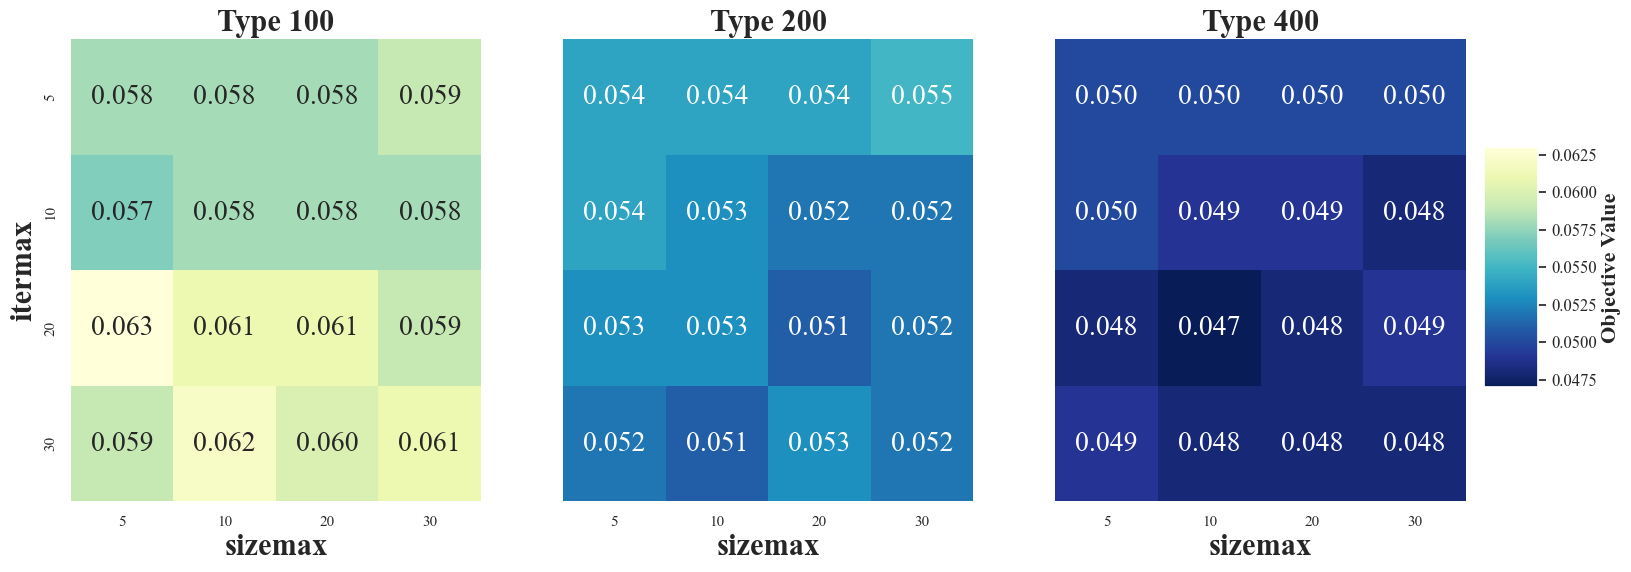

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="Times New Roman")
# Round 'obj' values to 3 decimal places
cp_merge['obj'] = cp_merge['obj'].round(3)

# Aggregate 'obj' values by the mean for each unique combination of 'type', 'sized', and 'ited'
new_df = cp_merge.groupby(['type', 'sized', 'ited'], as_index=False).agg({'obj': 'mean'})

# Pivot data for each type to use in heatmap
heatmap_data = {}
types = new_df['type'].unique()
for t in types:
    subset = new_df[new_df['type'] == t].pivot(index='ited', columns='sized', values='obj')
    heatmap_data[t] = subset

# Find the global min and max values across all heatmap data for consistent color scaling
min_val = min(subset.min().min() for subset in heatmap_data.values())
max_val = max(subset.max().max() for subset in heatmap_data.values())

# Plotting heatmaps with a shared color bar and consistent color scale
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  # Position for the shared color bar

for i, t in enumerate(types):
    sns.heatmap(heatmap_data[t], annot=True, fmt=".3f", cmap="YlGnBu_r", ax=axs[i],
                cbar=i == 0, cbar_ax=None if i else cbar_ax,
                vmin=min_val, vmax=max_val,
                annot_kws={"fontsize": 20, "fontname": "Times New Roman"})  # Use global min and max for consistent color scaling
    axs[i].set_title(f"Type {t}", fontsize=22, fontname="Times New Roman", fontweight='bold')
    axs[i].set_xlabel("sizemax", fontsize=22, fontname="Times New Roman", fontweight='bold')
    axs[i].set_ylabel("itermax" if i == 0 else "", fontsize=22, fontname="Times New Roman", fontweight='bold')

cbar = fig.colorbar(axs[0].collections[0], cax=cbar_ax)
cbar.set_label("Objective Value", fontsize=16, fontname="Times New Roman", fontweight='bold')
cbar.ax.tick_params(labelsize=12)
cbar.ax.yaxis.set_tick_params(labelsize=12, labelcolor='black', labelrotation=0, fontweight='bold')

plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust layout to fit color bar

# Customize tick label font sizes
for ax in axs:
    ax.tick_params(labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=22, fontname="Times New Roman", fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22, fontname="Times New Roman", fontweight='bold')

plt.savefig("CP_heatmap.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Admin\AppData\Local\Temp/ipykernel_17208/4265702095.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .905, 1])  # Adjust layout to fit color bar


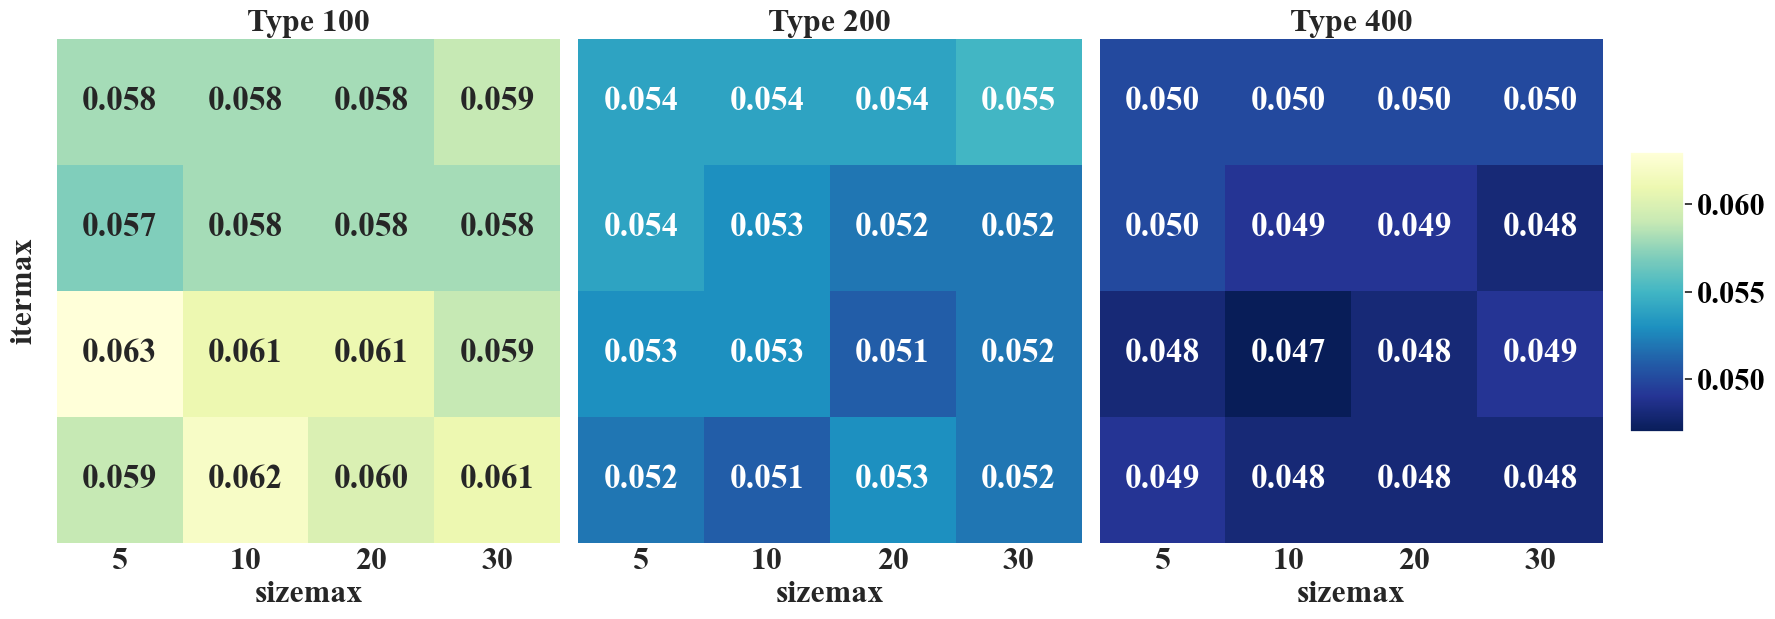

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="Times New Roman")
# Round 'obj' values to 3 decimal places
cp_merge['obj'] = cp_merge['obj'].round(3)

# Aggregate 'obj' values by the mean for each unique combination of 'type', 'sized', and 'ited'
new_df = cp_merge.groupby(['type', 'sized', 'ited'], as_index=False).agg({'obj': 'mean'})

# Pivot data for each type to use in heatmap
heatmap_data = {}
types = new_df['type'].unique()
for t in types:
    subset = new_df[new_df['type'] == t].pivot(index='ited', columns='sized', values='obj')
    heatmap_data[t] = subset

# Find the global min and max values across all heatmap data for consistent color scaling
min_val = min(subset.min().min() for subset in heatmap_data.values())
max_val = max(subset.max().max() for subset in heatmap_data.values())

# Plotting heatmaps with a shared color bar and consistent color scale
fig, axs = plt.subplots(1, 3, figsize=(18, 7), sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  # Position for the shared color bar

for i, t in enumerate(types):
    sns.heatmap(heatmap_data[t], annot=True, fmt=".3f", cmap="YlGnBu_r", ax=axs[i], square=True,  # Ensure square cells
                cbar=i == 0, cbar_ax=None if i else cbar_ax,
                vmin=min_val, vmax=max_val,
                annot_kws={"fontsize": 24, "fontname": "Times New Roman", "fontweight": "bold"})
    axs[i].set_title(f"Type {t}", fontsize=23, fontname="Times New Roman", fontweight='bold')
    axs[i].set_xlabel("sizemax", fontsize=23, fontname="Times New Roman", fontweight='bold')
    
    # Y-axis ticks and labels only for the first subplot
    if i == 0:
        axs[i].set_ylabel("itermax", fontsize=23, fontname="Times New Roman", fontweight='bold')
        # axs[i].tick_params(axis='y', labelsize=23, which='both', direction='in')
        # axs[i].set_yticklabels(axs[i].get_yticklabels(), fontsize=23, fontname="Times New Roman", fontweight='bold')
    else:
        axs[i].set_ylabel("")
        axs[i].tick_params(axis='y', left=False)  # Ensure no ticks for y-axis on other subplots
        axs[i].set_yticklabels([])  # Remove y-tick labels completely

    axs[i].tick_params(axis='x', labelsize=23, which='both', direction='in')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), fontsize=23, fontname="Times New Roman", fontweight='bold')

# Customize color bar font and bold
cbar = fig.colorbar(axs[0].collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=22, labelcolor='black')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontname("Times New Roman")

plt.tight_layout(rect=[0, 0, .905, 1])  # Adjust layout to fit color bar

# Customize tick label font sizes
for i, ax in enumerate(axs):
    if i == 0:
        ax.tick_params(labelsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=23, fontname="Times New Roman", fontweight='bold')
    else:
        ax.tick_params(labelsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=23, fontname="Times New Roman", fontweight='bold')
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=23, fontname="Times New Roman", fontweight='bold')

    

plt.savefig("CP_heatmap.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()


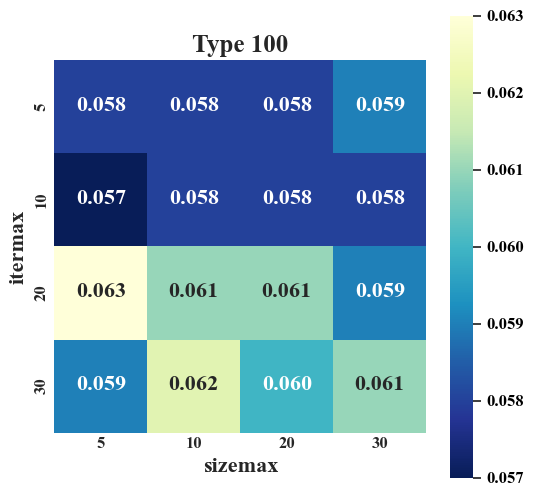

In [26]:
sns.set(font="Times New Roman")
# Round 'obj' values to 3 decimal places
cp_merge['obj'] = cp_merge['obj'].round(3)

# Aggregate 'obj' values by the mean for each unique combination of 'type', 'sized', and 'ited'
new_df = cp_merge.groupby(['type', 'sized', 'ited'], as_index=False).agg({'obj': 'mean'})

# Pivot data for the first type to use in heatmap
first_type = new_df['type'].unique()[0]
heatmap_data = new_df[new_df['type'] == first_type].pivot(index='ited', columns='sized', values='obj')

# Find the global min and max values for consistent color scaling (optional for single heatmap)
min_val = heatmap_data.min().min()
max_val = heatmap_data.max().max()

# Plotting the first heatmap
plt.figure(figsize=(6, 6))  # Adjust figure size for a single subplot
ax = sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu_r", square=True,
                 vmin=min_val, vmax=max_val,
                 annot_kws={"fontsize": 16, "fontname": "Times New Roman", "fontweight": "bold"})

# Set titles and labels
ax.set_title(f"Type {first_type}", fontsize=18, fontname="Times New Roman", fontweight='bold')
ax.set_xlabel("sizemax", fontsize=16, fontname="Times New Roman", fontweight='bold')
ax.set_ylabel("itermax", fontsize=16, fontname="Times New Roman", fontweight='bold')

# Customize tick labels
ax.tick_params(axis='both', labelsize=12, direction='in')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontname="Times New Roman", fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontname="Times New Roman", fontweight='bold')

# Add color bar with customized fonts
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12, labelcolor='black')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontname("Times New Roman")

# Save the figure
plt.savefig("CP_heatmap_single.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()